In [8]:
from experiments import FairletExperiment
from helper.data_loader import data_loader
from helper.plot_helper import plotHelper
import numpy as np

In [9]:
loader = data_loader('./config/dataset_config.json')
config = loader.get_config()

In [10]:
#set constants
dataset_names = ["adult", "bank"]
clustering_method = "k-centers"
num_experiments = 5
starting_randomState = 42
starting_num_clusters = 3
max_num_clusters = 20

In [11]:
dataset_name = "adult"
num_experiments = 1
X,_ = loader.load_dataset(dataset_name)
prepared_dataset = loader.prepare_dataset(X, dataset_name, complexity="simple")
validRandomStates = FairletExperiment.FindValidRandomStates(prepared_dataset, dataset_name, loader, num_experiments, 42)

In [12]:
from fairlets.fairlets import fairlet_decomposition
from helper.k_center import k_center
from helper.k_medians import k_medians

In [13]:
clustering_method = "k-medians"
sampled_dataset = loader.sample_data(prepared_dataset, dataset_name, validRandomStates[0])
reds, blues = loader.red_blue_split(sampled_dataset, dataset_name)
fairletDecomposition = fairlet_decomposition(sampled_dataset, blues, reds, dataset_name, loader)
fairlet_duration = fairletDecomposition.get_cluster_information(clustering_method=clustering_method, t=2, T=400)

In [14]:
k_medians_instance = k_medians(dataset_name, loader)
cluster_count, unfair_cost, unfair_balance, unfair_duration, fair_cost, fair_balance, fair_duration = fairletDecomposition.CalculateClusterCostAndBalance(None, k_medians_instance, clustering_method, 3, 5, "min")

IndexError: invalid index to scalar variable.

In [18]:
bla_assignment = k_medians_instance.cluster_assignment
cluster_mapping = {}
for cluster in set(k_medians_instance.cluster_assignment):
            cluster_mapping[cluster] = [i for i, x in enumerate(k_medians_instance.cluster_assignment) if x == cluster]

In [5]:
fairletDict = {}

for dataset_name in dataset_names:
    print(dataset_name)
    X,_ = loader.load_dataset(dataset_name)
    prepared_dataset = loader.prepare_dataset(X, dataset_name, complexity="simple")
    normalized_dataset = loader.normalize_data(prepared_dataset, dataset_name)

    validRandomStates = FairletExperiment.FindValidRandomStates(normalized_dataset, dataset_name, loader, num_experiments, starting_randomState)
    print(validRandomStates)
    fairletTuple = FairletExperiment.DoFairletExperiment(normalized_dataset, dataset_name, loader, validRandomStates, "fairlets", clustering_method , starting_num_clusters, max_num_clusters, "min")
    idString = "fairlet_" + dataset_name + "_" + clustering_method
    fairletDict[idString] = fairletTuple


adult
[42, 43, 45, 46, 48]
cluster count: 3
cluster count: 4
cluster count: 5
cluster count: 6
cluster count: 7
cluster count: 8
cluster count: 9
cluster count: 10
cluster count: 11
cluster count: 12
cluster count: 13
cluster count: 14
cluster count: 15
cluster count: 16
cluster count: 17
cluster count: 18
cluster count: 19
cluster count: 20
cluster count: 3
cluster count: 4
cluster count: 5
cluster count: 6
cluster count: 7
cluster count: 8
cluster count: 9
cluster count: 10
cluster count: 11
cluster count: 12
cluster count: 13
cluster count: 14
cluster count: 15
cluster count: 16
cluster count: 17
cluster count: 18
cluster count: 19
cluster count: 20
cluster count: 3
cluster count: 4
cluster count: 5
cluster count: 6
cluster count: 7
cluster count: 8
cluster count: 9
cluster count: 10
cluster count: 11
cluster count: 12
cluster count: 13
cluster count: 14
cluster count: 15
cluster count: 16
cluster count: 17
cluster count: 18
cluster count: 19
cluster count: 20
cluster count: 3
clust

ValueError: Unable to coerce to Series, length must be 1: given 2

In [ ]:
#elements in tuple of values in fairletDict are (in order):
#cluster_counts 
#unfair_costs 
#unfair_balances
#unfair_durations
#fair_costs
#fair_balances
#fair_durations

evaluation = "min"
num_clusterings = max_num_clusters - starting_num_clusters + 1

plot_dict = {}

for key, values in fairletDict.items():
    measurements_to_plot = []
    for value in range(len(values)):
        if value == 0:
            measurements_to_plot.append(values[value][0])
        elif value == len(values)-1:
            full_durations = []

            for clustering in range(num_clusterings):
                fair_dur = measurements_to_plot[value-1][clustering]

                if evaluation == "min":
                    full_durations.append(min(values[value]) + fair_dur)
                elif evaluation == "mean":
                    full_durations.append(np.average(values[value]) + fair_dur)
            measurements_to_plot.append(full_durations)

        else:
            value_res = []
            for clustering in range(num_clusterings):
                val_tmp = [measurement[clustering] for measurement in values[value]]
                if evaluation == "min":
                    value_res.append(min(val_tmp))
                elif evaluation == "mean":
                    value_res.append(np.average(val_tmp))
            measurements_to_plot.append(value_res)

    plot_dict[key] = measurements_to_plot

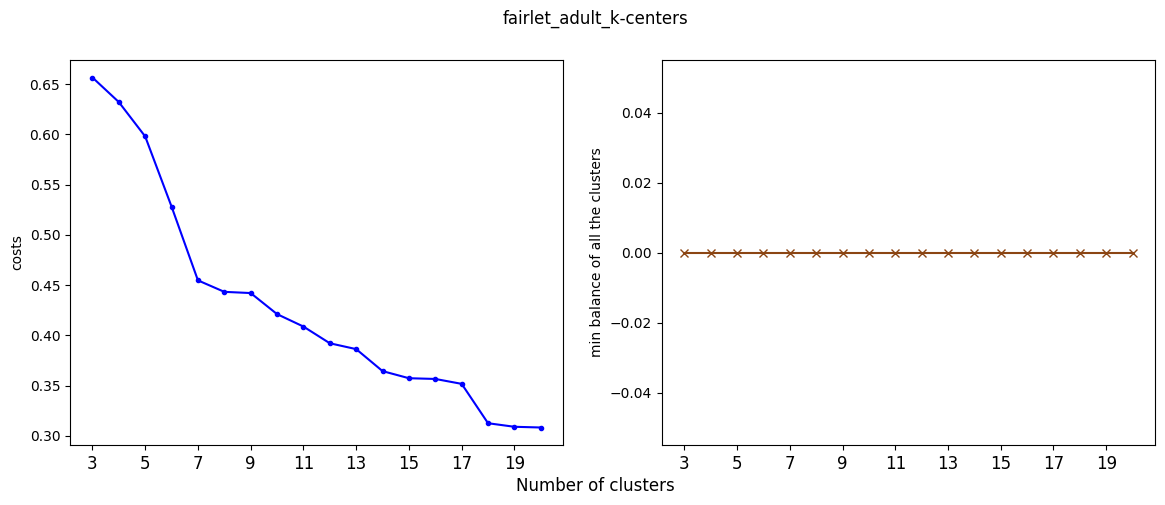

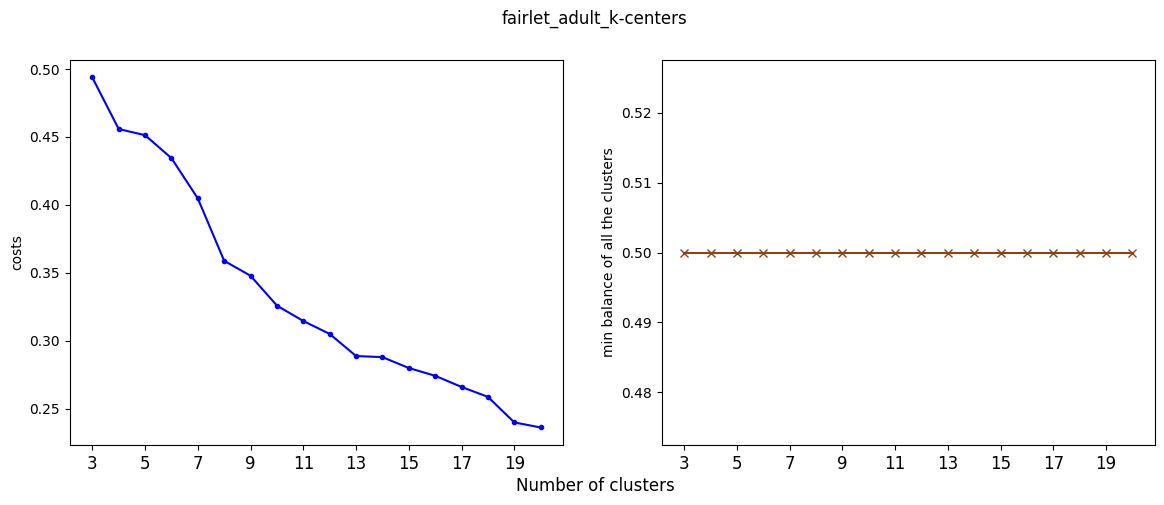

TypeError: plotHelper.plot_durations() takes 4 positional arguments but 5 were given

In [9]:
pltHlp = plotHelper()

for k, v in plot_dict.items():
    pltHlp.plot_costs_and_balance(v[0],v[2], v[1], 2, k)
    pltHlp.plot_costs_and_balance(v[0], v[5], v[4], 2, k)
    pltHlp.plot_durations(v[0], v[3], v[6], v[7])